In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [2]:
filepath = "F:\\Google Drive back ups\\Dissertation\\ontology\\user_recordings\\"

In [3]:
os.chdir(filepath)

In [4]:
os.listdir()

['user61593698535.json',
 'user61593698636.json',
 'user61593698677.json',
 'user8_1594139693.json',
 'user9_1594305539.json',
 'user9_1594306969.json',
 'user9_1594311913.json',
 'user9_1594313325.json',
 'user9_1594315284.json',
 'user9_1594392178.json',
 'user9_1594393607.json',
 'user9_1594395901.json',
 'user9_1594397691.json',
 'user9_1594399127.json',
 'user9_1594402379.json',
 'user9_1594567267.json',
 'user9_1594568702.json',
 'user9_1594570774.json',
 'user9_1594576248.json',
 'user9_1594652541.json',
 'user9_1594654743.json']

In [5]:
filenames = os.listdir()[4:]
filenames

['user9_1594305539.json',
 'user9_1594306969.json',
 'user9_1594311913.json',
 'user9_1594313325.json',
 'user9_1594315284.json',
 'user9_1594392178.json',
 'user9_1594393607.json',
 'user9_1594395901.json',
 'user9_1594397691.json',
 'user9_1594399127.json',
 'user9_1594402379.json',
 'user9_1594567267.json',
 'user9_1594568702.json',
 'user9_1594570774.json',
 'user9_1594576248.json',
 'user9_1594652541.json',
 'user9_1594654743.json']

In [6]:
dfs = {}
#final_dict = {}
for filename in filenames:
    with open(filepath+filename, "r") as fh:
        file_json = json.loads(fh.read())

    recordings = set()
    for user_model in file_json["user_models"]:
        for concept, value in user_model["interests"].items():
            recordings.add((concept, value["value"], value["timestamp"]))

    l = len(recordings)
    print(filename,l,file_json["metadata"]["decay_method"],file_json["metadata"]["decay_weight_concrete"])

    df_dict = {k:[v]*l for k,v in file_json["metadata"].items()}

    df_dict["concept"] = [record[0].split("#")[1] for record in recordings]
    df_dict["score"] = [record[1] for record in recordings]
    df_dict["timestamp"] = [record[2] for record in recordings]
    
    #for k,v in df_dict.items():
    #    final_dict[k] = final_dict.get(k, []) + v
    
    dfs[tuple(sorted(file_json["metadata"].items()))] = pd.DataFrame(df_dict)

user9_1594305539.json 383 to_abstract 0.5
user9_1594306969.json 380 to_abstract 0.5
user9_1594311913.json 386 to_abstract 0.333333333
user9_1594313325.json 383 to_abstract 0.666666667
user9_1594315284.json 384 to_abstract 0.8
user9_1594392178.json 385 to_abstract 0.5
user9_1594393607.json 385 to_abstract 0.5
user9_1594395901.json 385 to_abstract 0.5
user9_1594397691.json 385 to_abstract 0.5
user9_1594399127.json 383 to_abstract 0.5
user9_1594402379.json 383 to_abstract 0.5
user9_1594567267.json 386 to_zero 0.333333333
user9_1594568702.json 385 to_zero 0.666666667
user9_1594570774.json 386 to_zero 0.8
user9_1594576248.json 383 to_abstract 0.5
user9_1594652541.json 383 to_zero 0.5
user9_1594654743.json 380 to_zero 0.5


# Journey 1 user parameter permutations

#### Roscommon2, Westmeath2, Meath1, Westmeath5

In [7]:
with open("F:\Google Drive back ups\Dissertation\ontology\journeys\\1594306966.pkl", "rb") as fh:
    journey = pickle.load(fh)

In [8]:
journey

{'location': ['Roscommon2',
  'Roscommon2',
  'Roscommon2',
  'Roscommon2',
  'Roscommon2',
  'Westmeath2',
  'Meath1',
  'Westmeath5'],
 'lat': ['53.778330',
  '53.778330',
  '53.778330',
  '53.778330',
  '53.778330',
  '53.510275',
  '53.473547',
  '53.520954'],
 'lon': ['-8.103880',
  '-8.103880',
  '-8.103880',
  '-8.103880',
  '-8.103880',
  '-7.387118',
  '-7.013470',
  '-7.332567'],
 'time': [15.568427562713623,
  20.2179856300354,
  25.070617198944092,
  28.95821452140808,
  33.702428340911865,
  458.3768653869629,
  883.4636721611023,
  1307.421530008316]}

In [16]:
df = list(dfs.values())[0]

In [17]:
def get_loc(timestamp, variable, journey=journey):
    time_diffs = [abs(time-timestamp) for time in journey["time"]]
    idx = time_diffs.index(min(time_diffs))
    return journey[variable][idx]

In [18]:
df["lat"] = df["timestamp"].apply(lambda x: get_loc(x,"lat"))
df["lon"] = df["timestamp"].apply(lambda x: get_loc(x,"lon"))
df["location"] = df["timestamp"].apply(lambda x: get_loc(x,"location"))

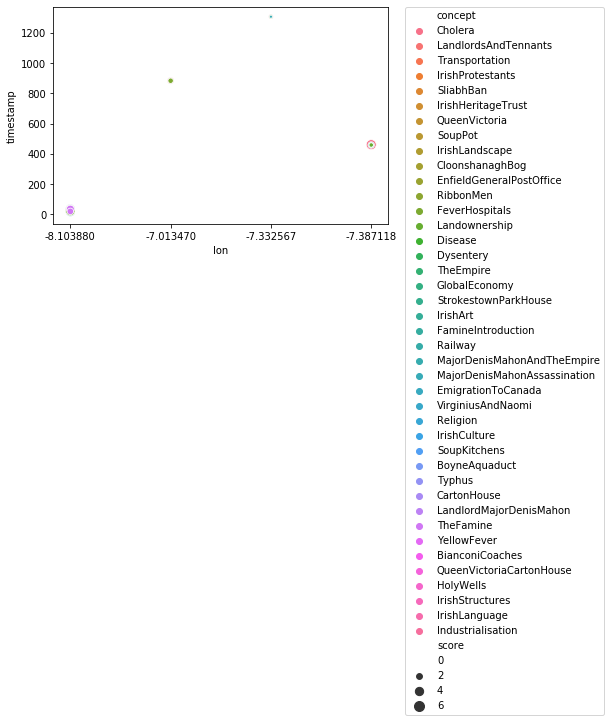

In [35]:
sns.scatterplot(x="lon", y="timestamp", data=df, hue="concept", size="score", sizes=(0,100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [21]:
def shift(row, dep_field_name, dep_field_values, indep_field_name="timestamp", shift_weight=100):
    #print(row[dep_field_name])
    idx = dep_field_values.index(row[dep_field_name])
    return row[indep_field_name]+(idx*shift_weight)

## decay function

In [33]:
temp_df = pd.DataFrame()
test_values = ["time", "step"]
for val in test_values:
    d = {
            "interest_weight": 5,
            "decay_function": val,
            "decay_weight_concrete": 0.5,
            "decay_weight_abstract": 0.666666667,
            "decay_interval_minutes": 3.5,
            "decay_method": "to_abstract" 
        }
    temp_df = temp_df.append(dfs[tuple(sorted(d.items()))])

In [34]:
temp_df.shape

(763, 9)

In [35]:
temp_df["timestamp"] = temp_df.apply(lambda x: shift(x, "decay_function", test_values), axis=1)

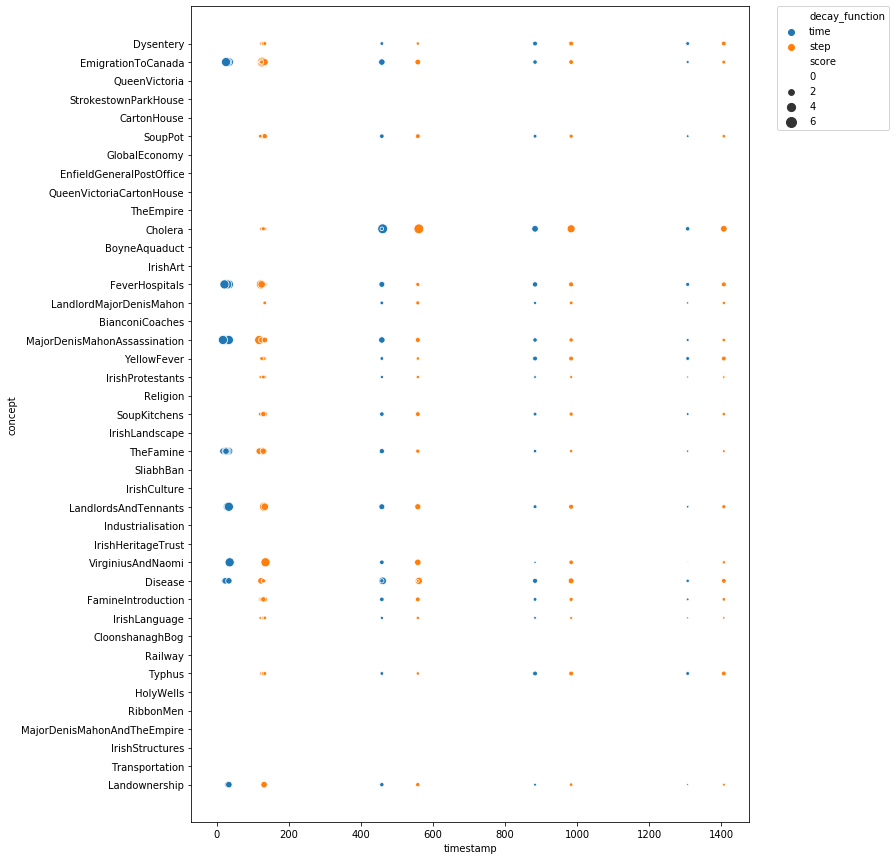

In [36]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="timestamp", y="concept", size="score", hue="decay_function", data=temp_df, sizes=(0,100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [12]:
temp_df = pd.DataFrame()
test_values = ["time", "step"]
for val in test_values:
    d = {
            "interest_weight": 5,
            "decay_function": val,
            "decay_weight_concrete": 0.5,
            "decay_weight_abstract": 0.666666667,
            "decay_interval_minutes": 3.5,
            "decay_method": "to_zero" 
        }
    temp_df = temp_df.append(dfs[tuple(sorted(d.items()))])

In [13]:
temp_df.shape

(763, 9)

In [14]:
temp_df["timestamp"] = temp_df.apply(lambda x: shift(x, "decay_function", test_values), axis=1)

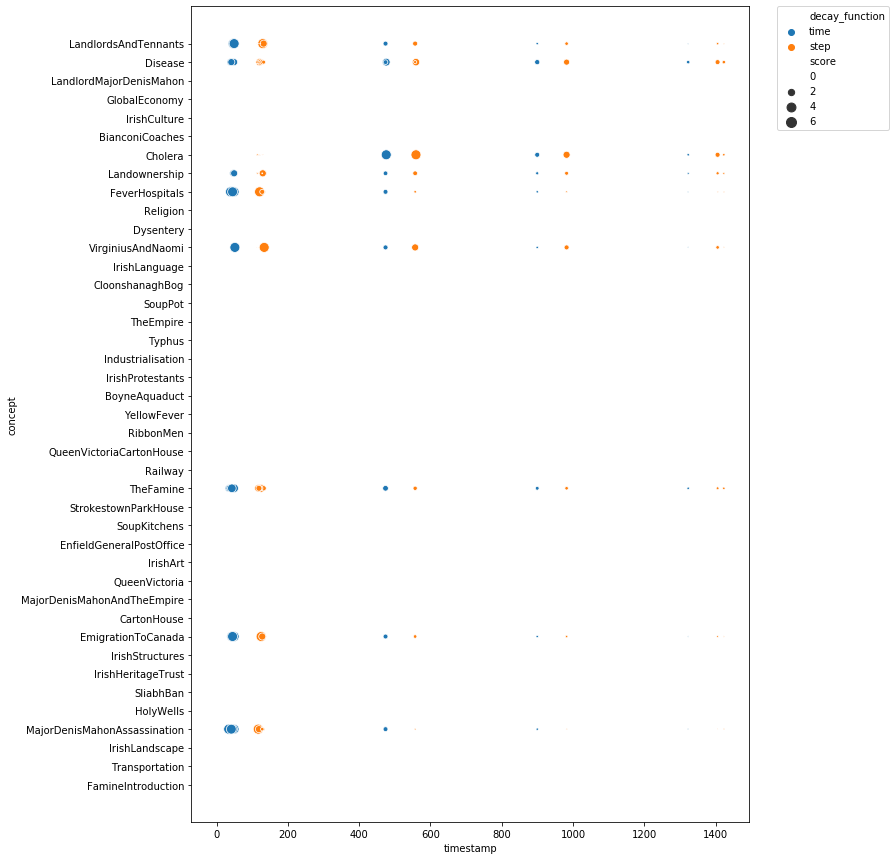

In [15]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="timestamp", y="concept", size="score", hue="decay_function", data=temp_df, sizes=(0,100))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# decay weight concrete

In [28]:
temp_df = pd.DataFrame()
test_values = [0.333333333, 0.5, 0.666666667, 0.8]
for val in test_values:
    d = {
            "interest_weight": 5,
            "decay_function": "time",
            "decay_weight_concrete": val,
            "decay_weight_abstract": 0.666666667,
            "decay_interval_minutes": 3.5,
            "decay_method": "to_zero" 
        }
    temp_df = temp_df.append(dfs[tuple(sorted(d.items()))])

In [29]:
temp_df["decay_weight_concrete"].value_counts()

0.333333    386
0.800000    386
0.666667    385
0.500000    383
Name: decay_weight_concrete, dtype: int64

In [31]:
temp_df["timestamp"] = temp_df.apply(lambda x: shift(x, "decay_weight_concrete", test_values, shift_weight=50), axis=1)

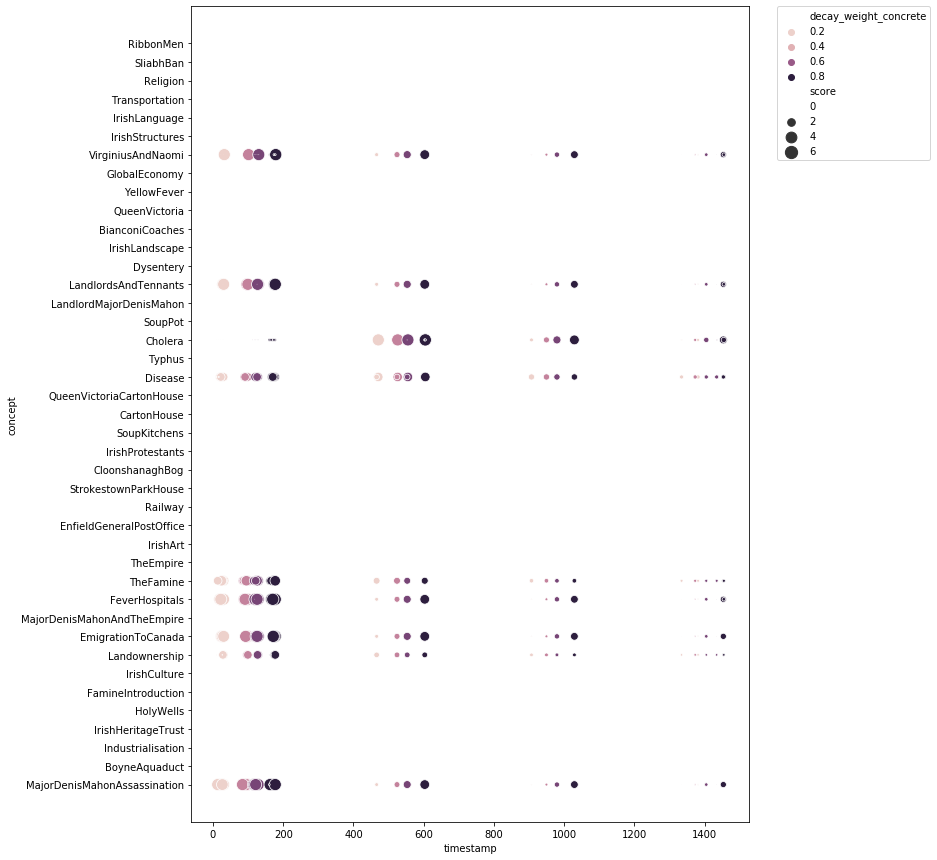

In [32]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="timestamp", y="concept", size="score", hue="decay_weight_concrete", data=temp_df, sizes=(0,150))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## decay weight abstract

In [14]:
temp_df = pd.DataFrame()
test_values = [0.333333333, 0.5, 0.666666667, 0.8]
for val in test_values:
    d = {
            "interest_weight": 5,
            "decay_function": "time",
            "decay_weight_concrete": 0.5,
            "decay_weight_abstract": val,
            "decay_interval_minutes": 3.5,
            "decay_method": "to_abstract" 
        }
    temp_df = temp_df.append(dfs[tuple(sorted(d.items()))])

In [15]:
temp_df["decay_weight_abstract"].value_counts()

0.333333    385
0.800000    385
0.500000    385
0.666667    383
Name: decay_weight_abstract, dtype: int64

In [16]:
temp_df["timestamp"] = temp_df.apply(lambda x: shift(x, "decay_weight_abstract", test_values, shift_weight=50), axis=1)

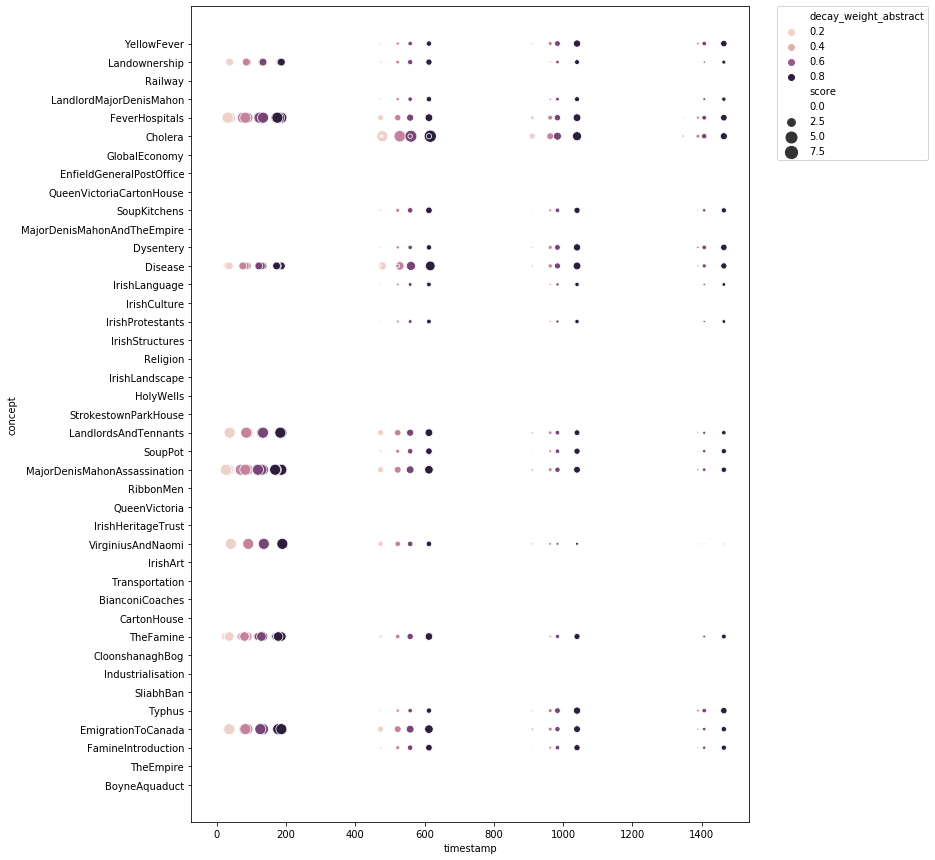

In [17]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="timestamp", y="concept", size="score", hue="decay_weight_abstract", data=temp_df, sizes=(0,150))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## decay interval minutes

In [10]:
temp_df = pd.DataFrame()
test_values = [0.25, 1, 3.5, 7, 14]
for val in test_values:
    d = {
            "interest_weight": 5,
            "decay_function": "time",
            "decay_weight_concrete": 0.5,
            "decay_weight_abstract": 0.666666667,
            "decay_interval_minutes": val,
            "decay_method": "to_abstract" 
        }
    temp_df = temp_df.append(dfs[tuple(sorted(d.items()))])

In [11]:
temp_df["decay_interval_minutes"].value_counts()

0.25     385
14.00    383
7.00     383
3.50     383
1.00     383
Name: decay_interval_minutes, dtype: int64

In [12]:
temp_df["timestamp"] = temp_df.apply(lambda x: shift(x, "decay_interval_minutes", test_values, shift_weight=50), axis=1)

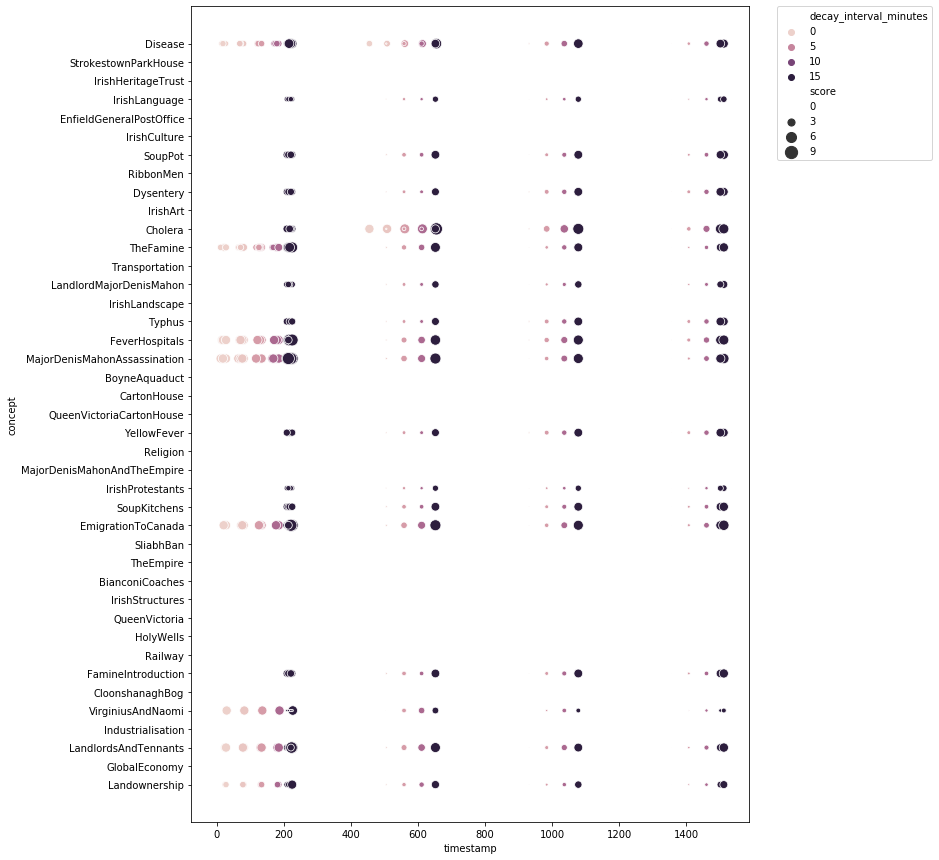

In [13]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="timestamp", y="concept", size="score", hue="decay_interval_minutes", data=temp_df, sizes=(0,150))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## decay method

In [19]:
temp_df = pd.DataFrame()
test_values = ["to_abstract","to_zero"]
for val in test_values:
    d = {
        "interest_weight": 5,
        "decay_function": "time",
        "decay_weight_concrete": 0.5,
        "decay_weight_abstract": 0.666666667,
        "decay_interval_minutes": 3.5,
        "decay_method": val 
    }
    temp_df = temp_df.append(dfs[tuple(sorted(d.items()))])

In [20]:
temp_df["decay_method"].value_counts()

to_zero        383
to_abstract    383
Name: decay_method, dtype: int64

In [21]:
temp_df["timestamp"] = temp_df.apply(lambda x: shift(x, "decay_method", test_values, shift_weight=50), axis=1)

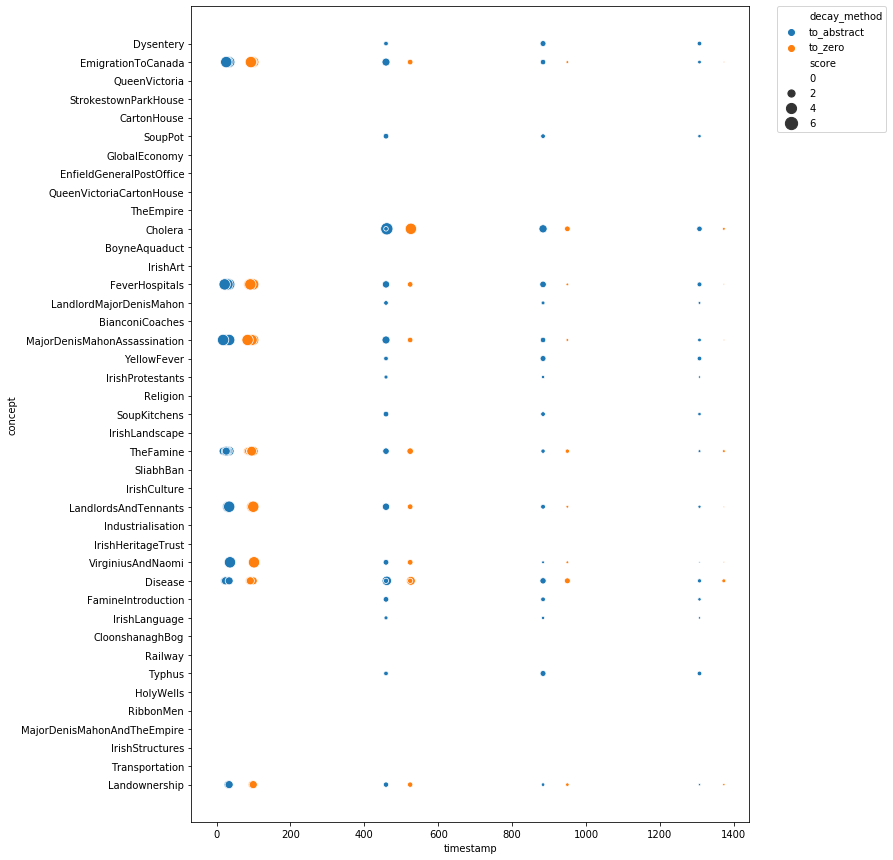

In [22]:
plt.figure(figsize=(10,15))
sns.scatterplot(x="timestamp", y="concept", size="score", hue="decay_method", data=temp_df, sizes=(0,150))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)